In [1]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
import seaborn as sns

import trompy as tp

colors_PVH = "#219C90"
colors_VMH  = "#90219c"

colors = [colors_PVH, colors_VMH]

cmap = "RdBu_r"

In [2]:
DATAFOLDER = Path("C:/Data/hislight_pickles/")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/figures")

with open(DATAFOLDER / "restricted_dark.pickle", 'rb') as handle:
    PVH = pickle.load(handle)

with open(DATAFOLDER / "HL3_restricted_dark.pickle", 'rb') as handle:
    VMH = pickle.load(handle)    

In [3]:
PVH_list_of_mice = []
VMH_list_of_mice = []

mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL306", "HL308",
                    "HL202", "HL205", "HL206", "HL211",
                    "HL301", "HL304", "HL305"]

#"HL202", "HL205", "HL206", "HL211" have poor placements without virus in PVH
#HL 306, 308 have no virus
#HL301, HL304, HL305 have poor fiber placement
#HL313 - HL318 are control mice


for key, val in PVH.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in PVH_list_of_mice:
            PVH_list_of_mice.append(val["mouse_ID"])
        
for key, val in VMH.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in VMH_list_of_mice:
            VMH_list_of_mice.append(val["mouse_ID"])

In [6]:
def get_snips(data, mice):

    snips_mean_full = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1

    for mouse in mice:
        snips_full = []

        for key, val in data.items():
            if val["mouse_ID"]==mouse:
                if len(val["licks"]) < 10:
                    continue

                lickdata= tp.lickCalc(val["licks"], minrunlength=3)

                snipper = tp.Snipper(val["corrected"],
                                        lickdata["rStart"],
                                        end=lickdata["rEnd"],
                                        fs=val["fs"],
                                        pre=pre,
                                        post=post,
                                        binlength=binlength,
                                        zscore=True
                                        )

                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=8, eventbalance=[6,2])
                snipper.find_potential_artifacts(threshold=12, method="absolute_diff", showplot=True, remove=True)
                snips_full.append(snipper.snips)
        
        try:
            snips_full = np.vstack(snips_full)
            snips_mean_full.append(np.mean(snips_full, axis=0))
            print("adding this mouse")
        except:
            print("no snips to concatenate")

    snips_mean_full = np.array(snips_mean_full)
    
    return snips_mean_full

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 2 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse


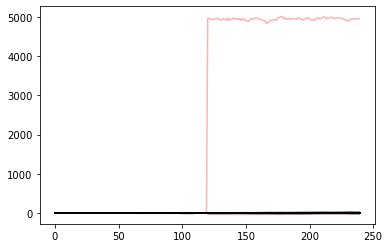

In [7]:
PVH_snips_mean_full = get_snips(PVH, PVH_list_of_mice)
VMH_snips_mean_full = get_snips(VMH, VMH_list_of_mice)

In [8]:
pre = 5
post = 10
mineventlength=8
binlength=0.1

eventbalance=[6,2]

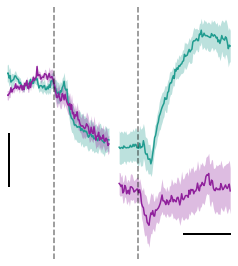

In [9]:
f, [ax1, ax2] =plt.subplots(ncols=2,
                            figsize=[3.4,3.5],
                                        gridspec_kw={"width_ratios":[15,1],
                                                     "wspace": 0.05,
                                                     "hspace": 0.1,
                                                     "left": 0,
                                                     "top": 1,
                                                     "bottom": 0,
                                                     "right": 1})

ax2.remove()

try:
    assert(eventbalance[0] + eventbalance[1] == mineventlength)
    early_t = eventbalance[0]
    late_t = eventbalance[1]
except:
    print("No event balance given. Using default 50-50 split.")
    early_t = mineventlength/2
    late_t = mineventlength/2
            
bins_early = int((pre + early_t) / binlength)
bins_late = int((post + late_t) / binlength)

#PVH
x1_PVH = np.arange(0,bins_early)
x2_PVH= np.arange(PVH_snips_mean_full.shape[1] - bins_late, PVH_snips_mean_full.shape[1])

mean_PVH = np.mean(PVH_snips_mean_full, axis=0)
error_values_PVH = np.std(PVH_snips_mean_full, axis=0) / np.sqrt(len(PVH_snips_mean_full))

ax1.plot(x1_PVH, mean_PVH[:bins_early], color=colors_PVH)
ax1.plot(x2_PVH, mean_PVH[-bins_late:], color=colors_PVH)

ax1.fill_between(x1_PVH, mean_PVH[:bins_early]-error_values_PVH[:bins_early], 
                mean_PVH[:bins_early]+error_values_PVH[:bins_early], 
                color=colors_PVH, alpha=0.3,
                linewidth=0)
ax1.fill_between(x2_PVH, mean_PVH[-bins_late:]-error_values_PVH[-bins_late:], 
                mean_PVH[-bins_late:]+error_values_PVH[-bins_late:], 
                color=colors_PVH, alpha=0.3,
                linewidth=0)

#VMH
x1_VMH = np.arange(0,bins_early)
x2_VMH= np.arange(VMH_snips_mean_full.shape[1] - bins_late, VMH_snips_mean_full.shape[1])

mean_VMH = np.mean(VMH_snips_mean_full, axis=0)
error_values_VMH = np.std(VMH_snips_mean_full, axis=0) / np.sqrt(len(VMH_snips_mean_full))

ax1.plot(x1_VMH, mean_VMH[:bins_early], color=colors_VMH)
ax1.plot(x2_VMH, mean_VMH[-bins_late:], color=colors_VMH)

ax1.fill_between(x1_VMH, mean_VMH[:bins_early]-error_values_VMH[:bins_early], 
                mean_VMH[:bins_early]+error_values_VMH[:bins_early], 
                color=colors_VMH, alpha=0.3,
                linewidth=0)
ax1.fill_between(x2_VMH, mean_VMH[-bins_late:]-error_values_VMH[-bins_late:], 
                mean_VMH[-bins_late:]+error_values_VMH[-bins_late:], 
                color=colors_VMH, alpha=0.3,
                linewidth=0)


for spine in ["top", "right", "left", "bottom"]:
    ax1.spines[spine].set_visible(False)

ax1.set_yticks([])
ax1.set_xticks([])

ax1.set_xlim([0,240])

transform = blended_transform_factory(ax1.transData, ax1.transAxes)
ax1.plot([190,240], [0.10, 0.10], linewidth=2, color="k", transform=transform)

ax1.plot([2,2], [-1, -2], linewidth=2, color="k")

ax1.axvline(50, color="k", linestyle="--", alpha=0.5)
ax1.axvline(140, color="k", linestyle="--", alpha=0.5)

f.savefig(FIGSFOLDER / "PVH_vs_VMH_restricted.pdf")

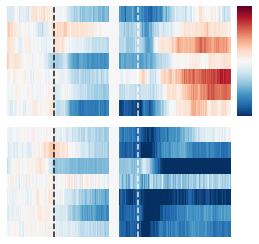

In [12]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[3.4,3.2],
                                        gridspec_kw={"width_ratios":[15,1],
                                                     "wspace": 0.05,
                                                     "hspace": 0.1,
                                                     "left": 0,
                                                     "top": 1,
                                                     "bottom": 0,
                                                     "right": 1})



sns.heatmap(PVH_snips_mean_full, ax=ax1, cbar_ax= ax2, cmap=cmap, vmax=3, vmin=-3,
            cbar_kws={"ticks": []})
sns.heatmap(VMH_snips_mean_full, ax=ax3, cbar_ax= ax4, cmap=cmap, vmax=3, vmin=-3, cbar_kws={"ticks": [2, 0, -2]})

ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="k", linestyle="--", alpha=0.9)
ax1.axvline(140, color="white", linestyle="--", alpha=0.9)

ax3.set_yticks([])
ax3.set_xticks([])
ax3.axvline(50, color="black", linestyle="--", alpha=0.9)
ax3.axvline(140, color="white", linestyle="--", alpha=0.9)

f.savefig(FIGSFOLDER / "PVH_vs_VMH_heatmap.pdf")

AUC 

In [10]:
epochs = {
    'baseline': (10, 50),
    'lick_early': (50, 110),
    'lick_late': (120, 140),
    'early_post': (140, 190),
    'late_post': (190, 240)
}

def calculate_auc_by_epoch(data, epochs):

    # Initialize results
    auc_baseline = []
    auc_lick_early = []
    auc_lick_late = []
    auc_early_post = []
    auc_late_post = []

    # Calculate AUCs for each snippet
    for snip in data:
        # Calculate AUC for each epoch and normalize
        baseline_auc = np.trapz(snip[epochs['baseline'][0]:epochs['baseline'][1]]) / (epochs['baseline'][1] - epochs['baseline'][0])
        lick_early_auc = np.trapz(snip[epochs['lick_early'][0]:epochs['lick_early'][1]]) / (epochs['lick_early'][1] - epochs['lick_early'][0])
        lick_late_auc = np.trapz(snip[epochs['lick_late'][0]:epochs['lick_late'][1]]) / (epochs['lick_late'][1] - epochs['lick_late'][0])
        early_post_auc = np.trapz(snip[epochs['early_post'][0]:epochs['early_post'][1]]) / (epochs['early_post'][1] - epochs['early_post'][0])
        late_post_auc = np.trapz(snip[epochs['late_post'][0]:epochs['late_post'][1]]) / (epochs['late_post'][1] - epochs['late_post'][0])
        
        # Append to respective lists
        auc_baseline.append(baseline_auc)
        auc_lick_early.append(lick_early_auc)
        auc_lick_late.append(lick_late_auc)
        auc_early_post.append(early_post_auc)
        auc_late_post.append(late_post_auc)
    
    return auc_baseline, auc_lick_early, auc_lick_late, auc_early_post, auc_late_post


In [11]:
PVH_baseline_AUC, PVH_early_lick_AUC, PVH_late_lick_AUC,PVH_early_post_AUC, PVH_late_post_AUC = calculate_auc_by_epoch(PVH_snips_mean_full, epochs)
VMH_baseline_AUC, VMH_early_lick_AUC, VMH_late_lick_AUC,VMH_early_post_AUC, VMH_late_post_AUC = calculate_auc_by_epoch(VMH_snips_mean_full, epochs)

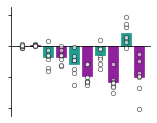

In [27]:
f,ax=plt.subplots(figsize=(2.5,2))

tp.barscatter([PVH_baseline_AUC, VMH_baseline_AUC,
                PVH_early_lick_AUC,VMH_early_lick_AUC,
                PVH_late_lick_AUC,VMH_late_lick_AUC,
                PVH_early_post_AUC,VMH_early_post_AUC,
              PVH_late_post_AUC,VMH_late_post_AUC],
              barfacecolor=[colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH],
              barfacecolor_option="individual",
              baredgecolor=[colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH,colors_PVH, colors_VMH],
              baredgecolor_option="individual",
              scattersize=20,
              scatteralpha=0.6,
              scatterlinecolor= "grey",
              ax=ax)

ax.set_yticklabels([])
ax.set_ylim([-4.5, 2.5])
ax.set_yticks([-4, -2, 0, 2])

f.savefig(FIGSFOLDER /  "PVH_vs_VMH_AUC_NEW.pdf")